In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
df = pd.read_csv(r"..\\Data\\us_data\\s&p500_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.sort_values("Date", inplace=True)
df.head(5)

,Index Name,Date,PE,Close,Earnings
0,S&p 500,1927-12-01,15.729730,17.46,1.110
1,S&p 500,1928-01-01,15.472198,17.53,1.133
2,S&p 500,1928-02-01,14.995671,17.32,1.155
3,S&p 500,1928-03-01,15.505523,18.25,1.177
4,S&p 500,1928-04-01,16.166667,19.40,1.200


In [4]:
df.shape

(1162, 5)

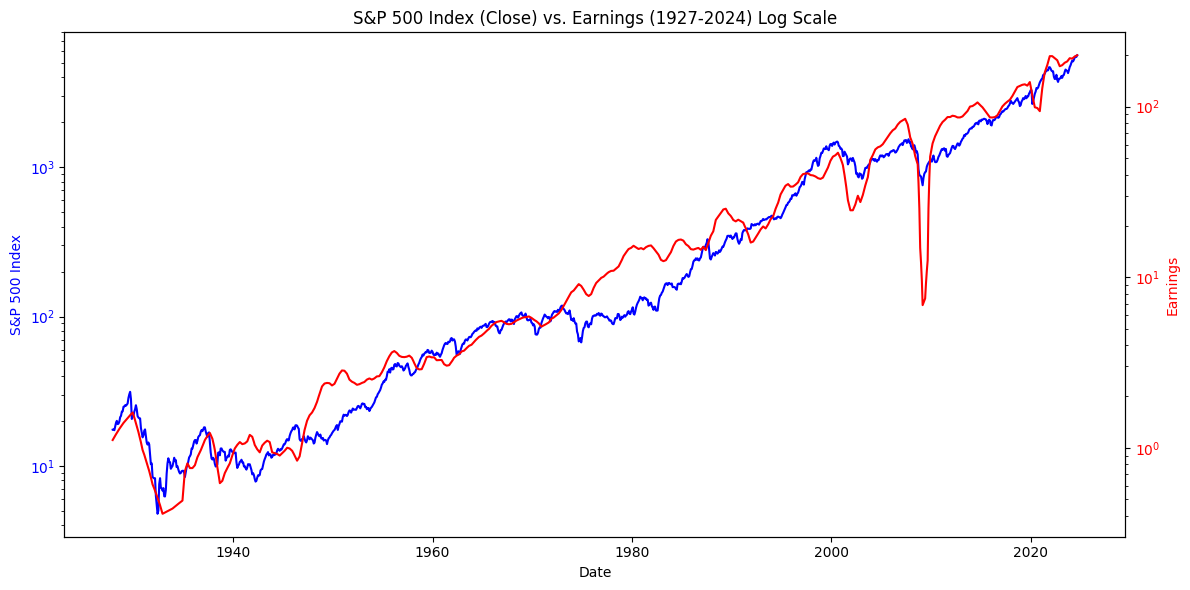

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Date"], df["Close"], color="blue", label="S&P 500 Index")
ax1.set_xlabel("Date")
ax1.set_ylabel("S&P 500 Index", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Earnings"], color="red", label="Earnings")
ax2.set_ylabel("Earnings", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_yscale('log')

plt.title("S&P 500 Index (Close) vs. Earnings (1927-2024) Log Scale")
fig.tight_layout()
plt.show()

In [6]:
correlation = df["Close"].corr(df["Earnings"])
print(correlation)

0.9739120924710221


In [7]:
df = df[df["Date"] >= pd.to_datetime("1999-01-01")]
df.shape

(309, 5)

Roughly linear relation b/w Nifty 50 and its earnings

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


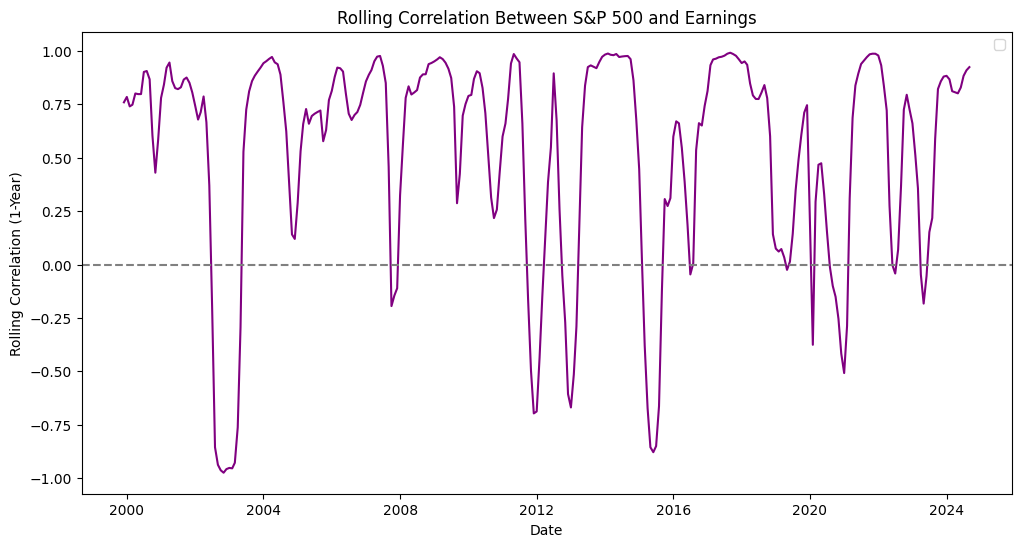

In [8]:
df["Rolling_Corr"] = df["Close"].rolling(12).corr(df["Earnings"])  #monthly data so using 12 for 1Y

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Rolling_Corr"], color="purple")
plt.axhline(0, linestyle="--", color="gray")

plt.xlabel("Date")
plt.ylabel("Rolling Correlation (1-Year)")
plt.title("Rolling Correlation Between S&P 500 and Earnings")
plt.legend()
plt.show()

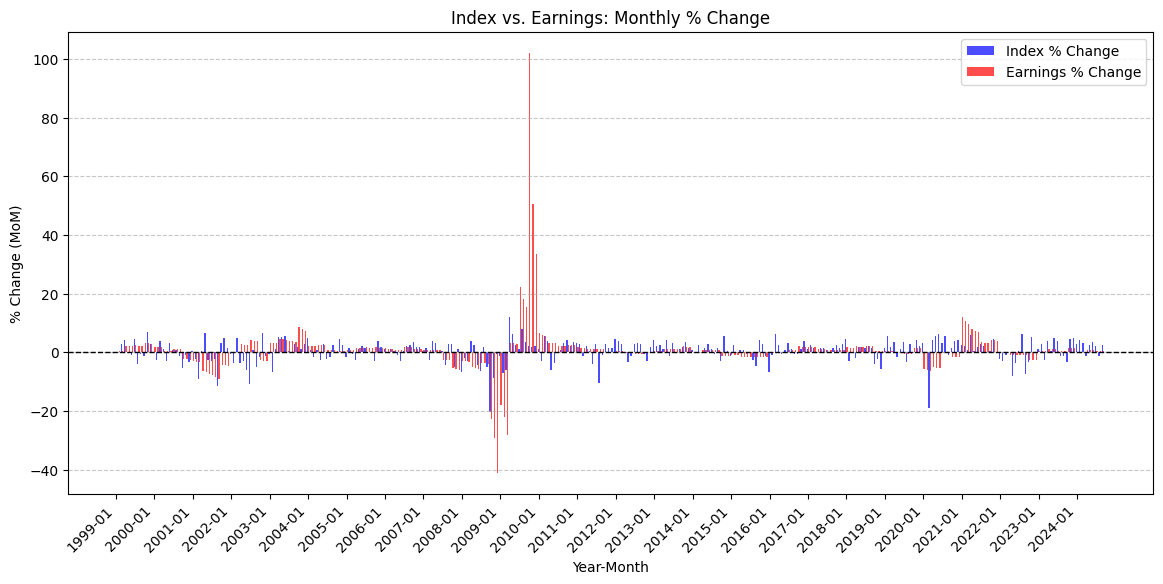

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# Extract Year-Month for grouping
df["YearMonth"] = df["Date"].dt.to_period("M")

# Group by Month and compute % change
df_monthly = df.groupby("YearMonth").agg({"Close": "last", "Earnings": "last"})
df_monthly["Index_MoM"] = df_monthly["Close"].pct_change() * 100
df_monthly["Earnings_MoM"] = df_monthly["Earnings"].pct_change() * 100

# Convert YearMonth to string for plotting
months = df_monthly.index.astype(str)
index_changes = df_monthly["Index_MoM"]
earnings_changes = df_monthly["Earnings_MoM"]

# Define bar positions
x = np.arange(len(months))  
width = 0.4  

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, index_changes, width, label="Index % Change", color="blue", alpha=0.7)
bars2 = ax.bar(x + width/2, earnings_changes, width, label="Earnings % Change", color="red", alpha=0.7)

# Labels & Grid
ax.set_xlabel("Year-Month")
ax.set_ylabel("% Change (MoM)")
ax.set_title("Index vs. Earnings: Monthly % Change")
ax.set_xticks(x[::12])  # Show only one tick per year for readability
ax.set_xticklabels(months[::12], rotation=45, ha="right")  
ax.axhline(0, color="black", linestyle="--", linewidth=1)  
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()